<a href="https://colab.research.google.com/github/Jaskirat1/AIT_LogisticRegression/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression

In [151]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [152]:
digits = load_digits()

In [153]:
print("Image Data Shape", digits.data.shape)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


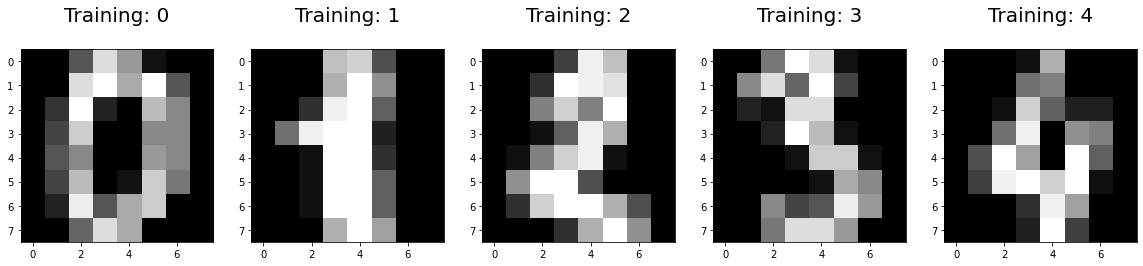

In [154]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1, 5, index + 1)
  plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize=20 )

In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state= 2)

In [156]:
print(X_train.shape)

(1383, 64)


In [157]:
print(y_train.shape)

(1383,)


In [158]:
print(X_test.shape)

(414, 64)


In [159]:
print(y_test.shape)

(414,)


In [160]:
from sklearn.linear_model import LogisticRegression
import matplotlib.cm as cm
from sklearn import metrics

In [161]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [162]:
print(model.predict(X_test[0].reshape(1,-1)))

[4]


In [164]:
model.predict(X_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [144]:
predictions = model.predict(X_test)

In [168]:
score = model.score(X_test, y_test)

In [169]:
print(score)

0.9516908212560387


In [170]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)


[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1.0, 'Accuracy Score: (0)')

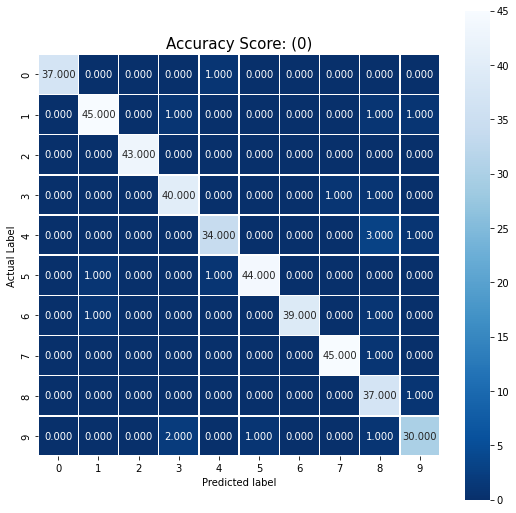

In [171]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt= ".3f", linewidth = .5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted label')
all_sample_title ='Accuracy Score: (0)'.format(score)
plt.title(all_sample_title, size = 15)

In [173]:
index = 0 
classifiedindex = []
for predict, actual in zip(predictions, y_test):
  if predict == actual:
    classifiedindex.append(index)
  index +=1


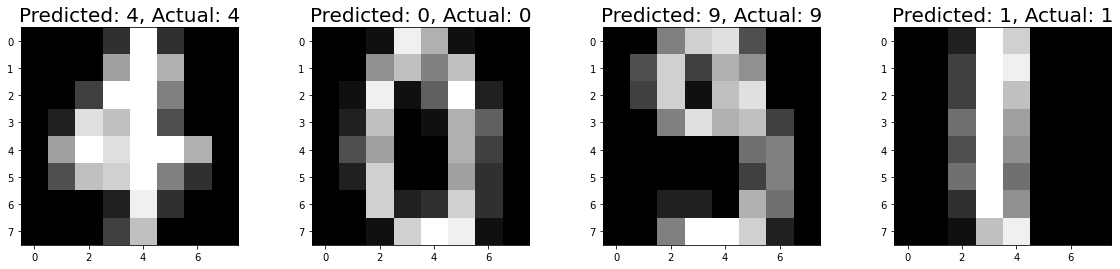

In [174]:
plt.figure(figsize=(20,4))
for plotIndex, wrong in enumerate(classifiedindex[0:4]):
  plt.subplot(1,4, plotIndex +1)
  plt.imshow(np.reshape(X_test[wrong], (8,8)),cmap=plt.cm.gray)
  plt.title('Predicted: {}, Actual: {}'.format(predictions[wrong], y_test[wrong]), fontsize = 20)
